In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sbdb_query_results.csv')

/var/folders/mg/wtpflw8566bff9dt0wgqm4nh0000gn/T/ipykernel_1876/2162709595.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sbdb_query_results.csv')


In [3]:
df.head()

,spkid,full_name,pdes,neo,pha,sats,H,G,diameter,per,moid,class,first_obs,last_obs,n_obs_used,n_del_obs_used,n_dop_obs_used
0,2000001,1 Ceres (A801 AA),1,N,N,0,3.33,0.12,939.400,1680.0,1.58,MBA,1995-01-05,2021-01-28,1075.0,60.0,0.0
1,2000002,2 Pallas (A802 FA),2,N,N,0,4.12,0.11,513.000,1680.0,1.23,MBA,1804-08-27,2022-10-06,9049.0,NaN,NaN
2,2000003,3 Juno (A804 RA),3,N,N,0,5.15,0.32,246.596,1590.0,1.04,MBA,1804-10-17,2023-01-22,7445.0,NaN,NaN
3,2000004,4 Vesta (A807 FA),4,N,N,0,3.22,0.32,525.400,1330.0,1.14,MBA,1950-09-23,2021-03-17,9451.0,2977.0,0.0
4,2000005,5 Astraea (A845 XA),5,N,N,0,7.00,NaN,106.699,1510.0,1.11,MBA,1845-12-15,2023-01-07,3454.0,NaN,NaN


In [6]:
df.moid.isna().sum()

4342

In [7]:
df.pha.value_counts(normalize=True)

N    0.998167
Y    0.001833
Name: pha, dtype: float64

In [45]:
df[df.pha == "Y"].sats.value_counts(normalize=False)

0    2266
1      49
2       3
Name: sats, dtype: int64

In [17]:
df['class'].value_counts(normalize=True) * 100

MBA    88.755486
OMB     3.061915
IMB     2.139493
MCA     1.893939
APO     1.388668
TJN     0.977339
AMO     0.886781
TNO     0.332730
ATE     0.193627
PAR     0.138788
JFc     0.059638
CEN     0.054052
COM     0.052714
HYP     0.036271
AST     0.009913
HTC     0.007868
ETc     0.005507
IEO     0.002203
CTc     0.001495
JFC     0.001338
HYA     0.000236
Name: class, dtype: float64

Text(0.5, 1.0, 'MOID Dist.')

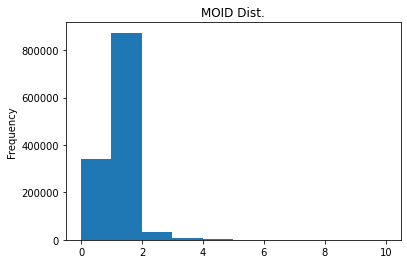

In [48]:
df[df.moid < 10].moid.plot(kind='hist')
plt.title('MOID Dist.')

Text(0.5, 1.0, 'Diameter Plot')

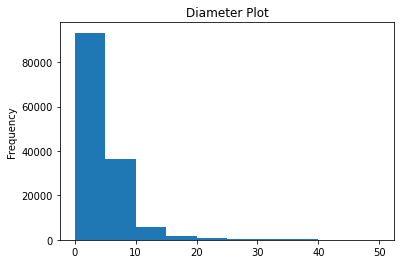

In [49]:
df[df.diameter < 50].diameter.plot(kind='hist')
plt.title("Diameter Plot")

In [28]:
print(f"Mean period (y) : {round(df.per.mean() / 365.25, 2)}")
print(f"Std period (y) : {round(df.std().per / 365.25, 2)}")

Mean period (y) : 4253.98
Std period (y) : 2073937.96


In [34]:
df['per_year'] = df.per / 365.25

<AxesSubplot:ylabel='Frequency'>

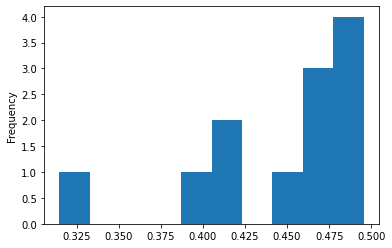

In [36]:
df[df.per_year < 0.5].per_year.plot(kind='hist')

In [38]:
df.per.min() / 365.25

0.31485284052019163

<AxesSubplot: ylabel='Frequency'>

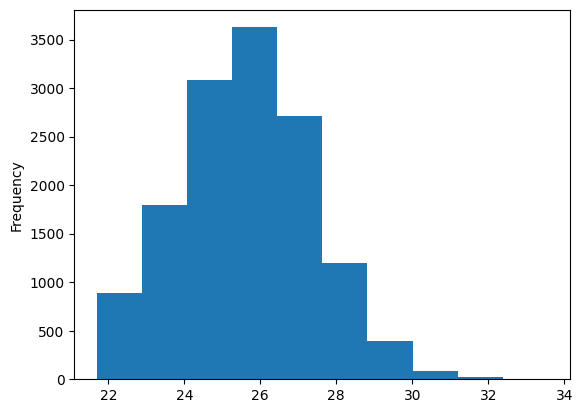

In [13]:
df[(df.moid < 0.05) & (df.pha == "N")].H.plot(kind="hist")

In [16]:
df[df.pha == "Y"].H.max()

22.4

/Users/carlosbrown/Documents/GitHub/esports-valorant-eda/env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='H', ylabel='diameter'>

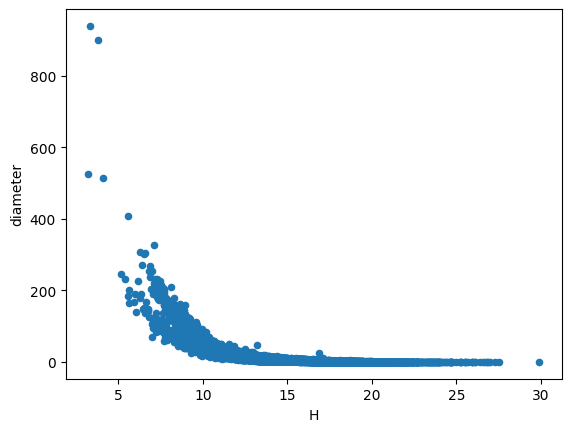

In [17]:
df.plot(kind="scatter", x="H", y="diameter")